<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import itertools
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #--------------splitting data into test and train
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.core.pylabtools import figsize
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
%matplotlib inline
!sudo pip3 install keras

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.layers import LocallyConnected2D
from tensorflow.keras.layers import LocallyConnected1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
print(tf.__version__)
from matplotlib import pyplot as plt
from random import randint

import keras
from   keras.models import Sequential
from   keras.layers import Dense

2.8.0


##Predicción de sobrecarga en grupos de líneas de transmisión.
En esta sección se usará inferencia bayesiana para ajustar un modelo de regresión logística a datos de violación de flujo de potencia eléctrica en grupos de líneas de transmisión, que interconectan regiones eléctricas. La variable dependientes es de naturaleza binaria con un valor de uno si la línea presenta sobrecarga y cero si no. Las variables independientes son el flujo neto máximo y mínimo en la región eléctrica en un día y se calcula como la diferencia entre la demanda menos la generación en cada región.

In [3]:
df = pd.read_csv('overload.csv')
df = df.assign(const=1)
dfy = df[['L3','L5','L6','L7','L14','L15','L22','L31','L38','L39','L51','L58','L65']] #Se escoge el número de la línea de transmisión
dfx = df[['CEN','NES','NOR','NTE','OCC','ORI','PEN','CEN_min','NES_min','NOR_min','NTE_min','OCC_min','ORI_min','PEN_min']] ## Predictors

X = dfx.to_numpy()
y = dfy.to_numpy()

#Normalizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

## Crea conjuntos de datos de entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.7) #, random_state = 5

#df.sample(5)
#df.describe()
# df.head()

A continuación se enlista las configuraciones de red usadas en el libro (para resolver el problema *11.7 Example: ZIP Code Data*). 
*   Net-1: Sin capa oculta, equivalente a regresión logística multinomial.
*   Net-2: Una capa oculta, 12 unidades ocultas totalmente conectadas.
*   Net-3: Dos capas ocultas conectadas localmente.
*   Net-4: Dos capas ocultas, conectadas localmente con peso compartido.
*   Net-5: dos capas ocultas, conectadas localmente, dos niveles de peso compartido.

Trataremos de replicar el ejercicio aplicando a nuestros datos. A diferencia del problema de 2 dimensiones del libro, usaremos redes para una sola dimensión para predecir un vector de binarios (sobrecarga o no de algunas líneas de tranmisión) a partir de un vector de datos reales (datos de demanda de las regiones eléctricas). También mencionan que todas las redes tienen unidades de salida sigmoidales y el ajuste es con mínimpos cuadrados.

In [4]:
#https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5
## Neural network

input_dim   = 14
num_classes = 2 ## {salidas}

model  = Sequential()

## Net-1
model.add(Dense(units = num_classes, input_dim = 14, activation='sigmoid' )) ## FUNCIONA !!! , activation='relu',
nfig = 1

'''
## Net-2
model.add(Dense(units=12, input_dim = input_dim,  activation ='sigmoid' )) ## FUNCIONA !!!
model.add(Dense(units=num_classes,         activation ='sigmoid'))
nfig = 2
'''

'''
## Net-3
input_dim = (14,1)
input_ = Input(input_dim, name = 'the_input')
layer1 = LocallyConnected1D(1, 2, strides= 2, activation= 'sigmoid', name = 'layer1')(input_)
layer2 = LocallyConnected1D(1, 5, activation='sigmoid', name = 'layer2')(layer1)
layer3 = Flatten(name='layer3')(layer2) 
output = Dense(units=num_classes, activation='sigmoid', name = 'output')(layer3)
model = Model(inputs = input_, outputs = output)
input_dim = np.expand_dims(input_dim, axis=0)
nfig = 3
'''

'''
## Net-4
input_dim = (14,1)
input_ = Input(input_dim, name = 'the_input')
layer1 = Conv1D(filters=2, kernel_size=2, strides=2, activation='sigmoid', name='layer1')(input_) 
layer2 = LocallyConnected1D(1, 5, activation='sigmoid', name='layer2')(layer1)
layer3 = Flatten(name='layer3')(layer2) 
output = Dense(units=num_classes, activation='sigmoid', name = 'output')(layer3)
model = Model(inputs = input_, outputs = output)
input_dim = np.expand_dims(input_dim, axis=0)
nfig = 4

'''
'''
## Net-5
input_dim = (14,1)
input_ = Input(input_dim, name = 'the_input')
layer1 = Conv1D(2, 2, strides= 2, activation= 'sigmoid', name = 'layer1')(input_)
layer2 = Conv1D(4, 5, activation='sigmoid', name = 'layer2')(layer1)
layer3 = Flatten(name='layer3')(layer2) 
output = Dense(units=num_classes, activation='sigmoid', name = 'output')(layer3)
model = Model(inputs = input_, outputs = output)
input_dim = np.expand_dims(input_dim, axis=0)
nfig = 5
'''

'''
## LeNet5
Hg = 200
Lng = 80

#Layer 1
#Conv Layer 1
input_dim = (14,1)
model.add(Conv1D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', 
                 input_shape = input_dim ))
#Pooling layer 1
model.add(MaxPooling1D(pool_size = 2, strides = 2))
#Layer 2
#Conv Layer 2
model.add(Conv1D(filters = 16, kernel_size = 5,strides = 1,activation = 'relu',
                 input_shape = input_dim ))
#Pooling Layer 2
model.add(MaxPooling1D(pool_size = 2, strides = 2))

#Flatten
model.add(Flatten())
#Layer 3
#Fully connected layer 1
model.add(Dense(units = 120, activation = 'relu'))
#Layer 4
#Fully connected layer 2
model.add(Dense(units = 84, activation = 'relu'))
#Layer 5
#Output Layer
model.add(Dense(units = 2, activation = 'sigmoid'))
'''

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 30        
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [5]:
#parametros https://www.tensorflow.org/api_docs/python/tf/keras/Model
#RMSprop, categorical_crossentropy, adam, binary_crossentropy, categorical_crossentropy, sgd
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

Accuracy of  234  is: 79.14893617021276
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


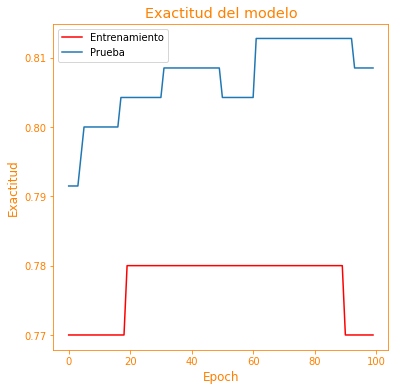

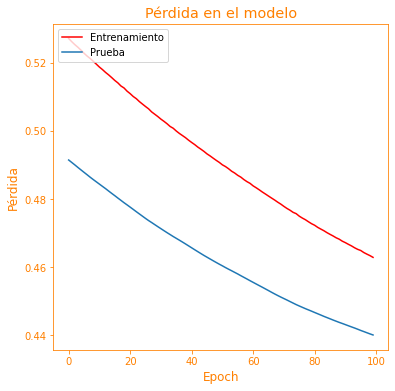

Accuracy of  234  is: 67.65957446808511
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


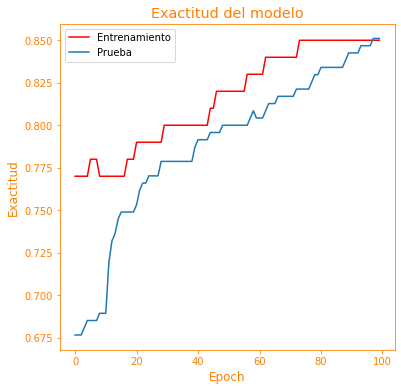

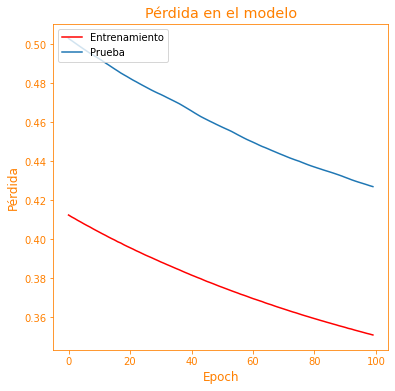

Accuracy of  234  is: 79.14893617021276
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


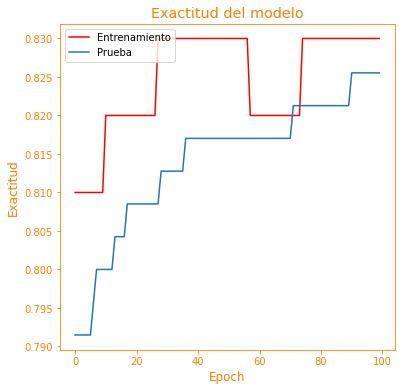

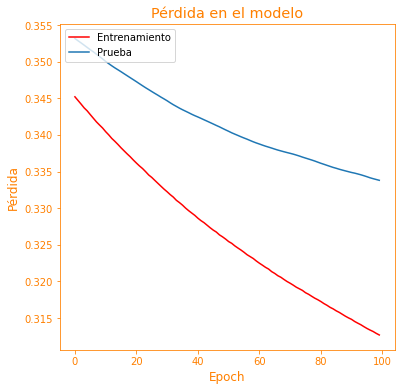

Accuracy of  234  is: 82.12765957446808
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


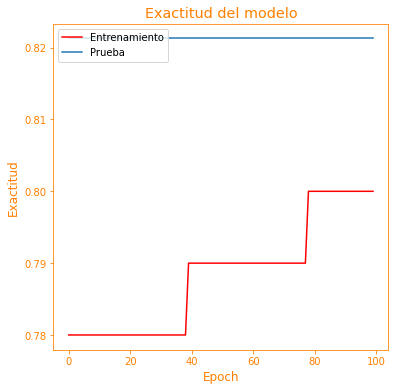

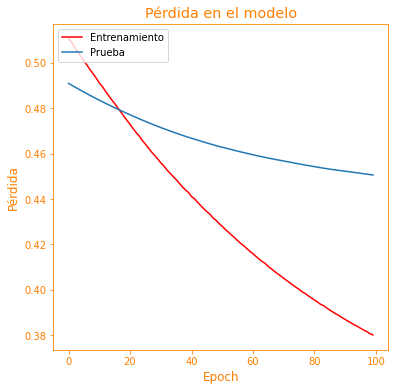

Accuracy of  234  is: 99.14893617021276
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


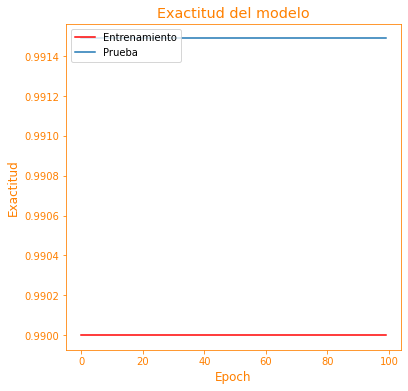

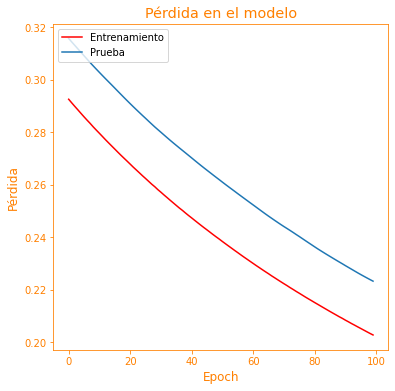

Accuracy of  234  is: 98.29787234042553
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


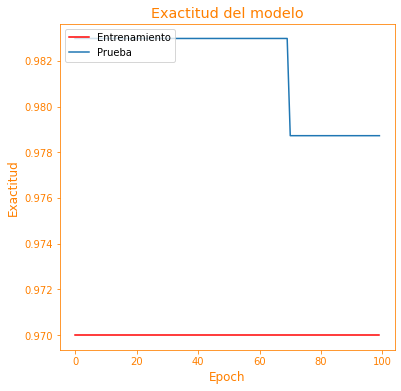

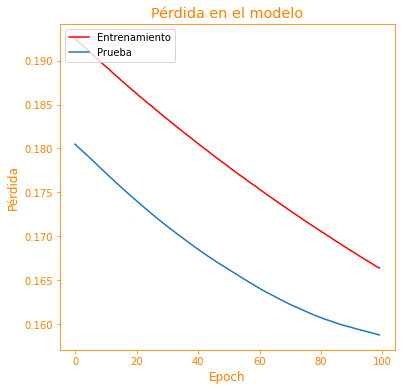

Accuracy of  234  is: 97.44680851063829
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


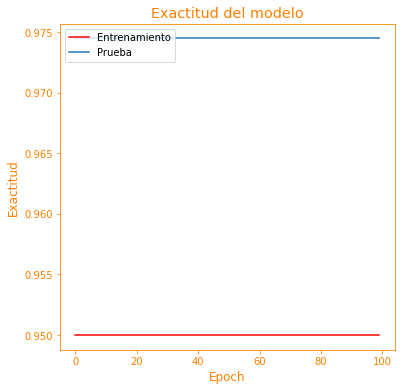

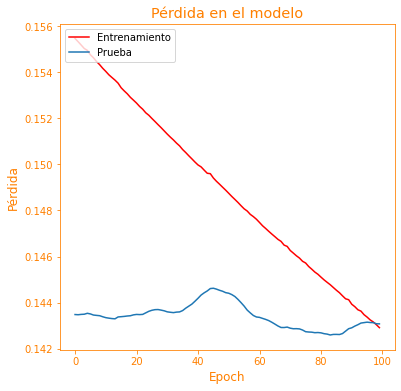

Accuracy of  234  is: 80.0
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


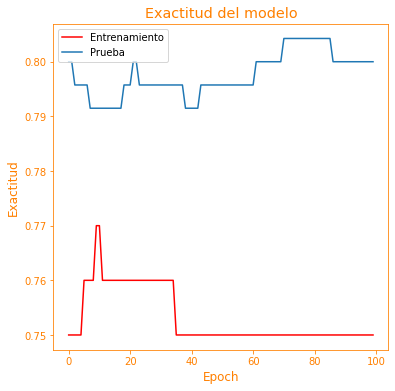

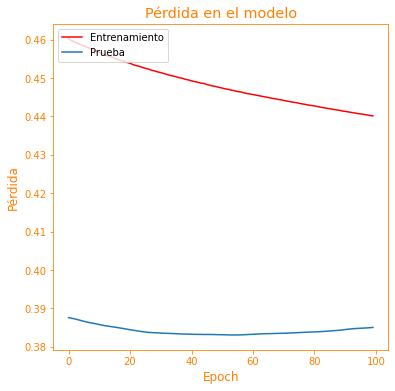

Accuracy of  234  is: 80.0
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


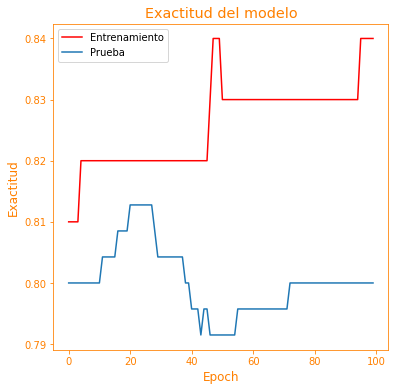

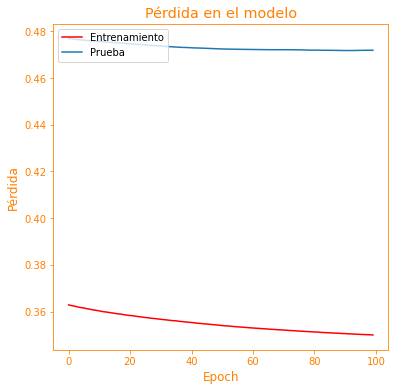

Accuracy of  234  is: 93.61702127659575
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


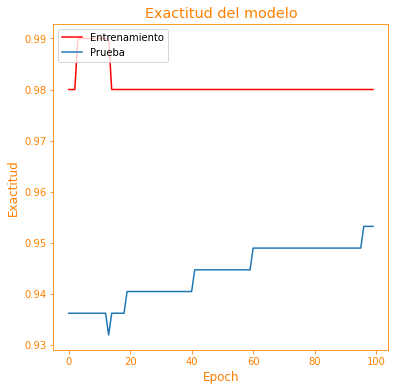

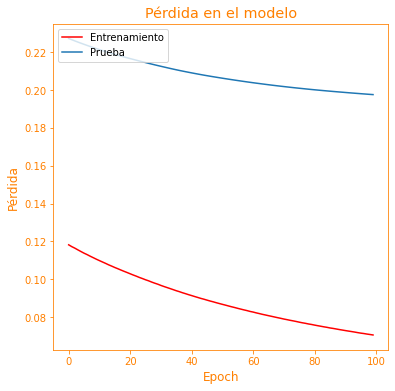

Accuracy of  234  is: 75.74468085106383
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


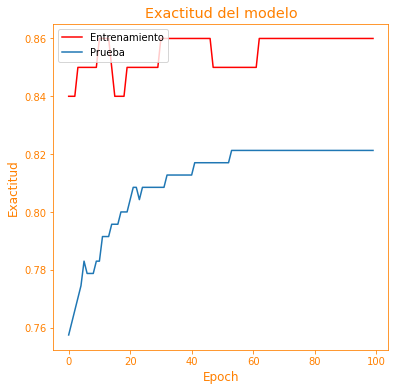

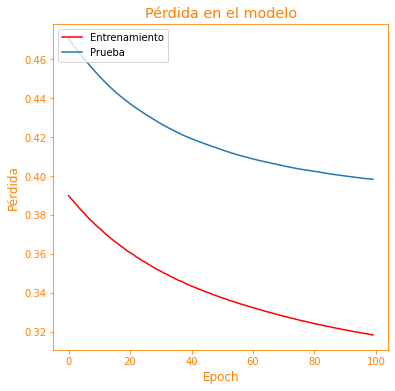

Accuracy of  234  is: 87.2340425531915
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


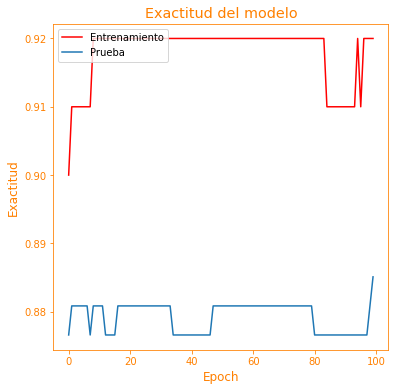

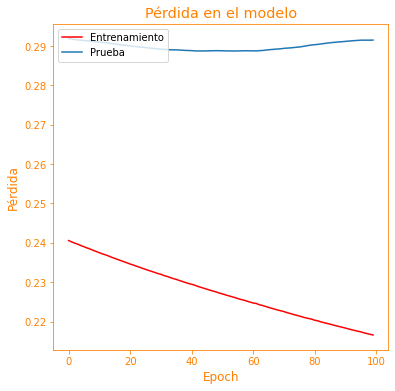

Accuracy of  234  is: 83.40425531914893
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


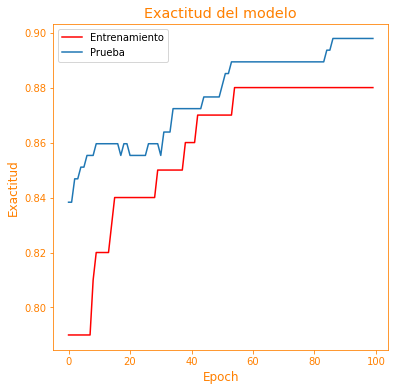

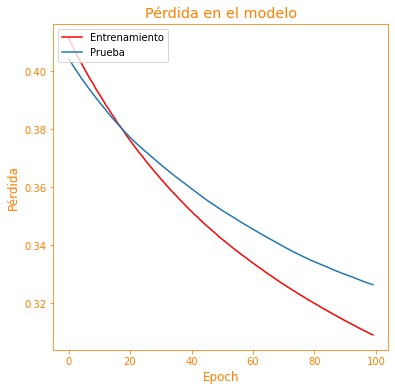

In [6]:
epochs     = 100 
batch_size = 64
verbose    = 0

for i in ['L3','L5','L6','L7','L14','L15','L22','L31','L38','L39','L51','L58','L65']:
    dfy = df[[i]] #Se escoge el número de la línea de transmisión
    y = dfy.to_numpy()    
    ohe = OneHotEncoder()
    y = ohe.fit_transform(y).toarray()
    ## Crea conjuntos de datos de entrenamiento y prueba
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.7) #, random_state = 5
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose) 

    y_pred = model.predict(X_test)
    #Converting predictions to label
    pred = list()
    for i in range(len(y_pred)):
        pred.append(np.argmax(y_pred[i]))
    #Converting one hot encoded test label to label
    test = list()
    for i in range(len(y_test)):
        test.append(np.argmax(y_test[i]))

    a = accuracy_score(pred,test)
    print('Accuracy of ',i,' is:', a*100)
    
    history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size,verbose=verbose) #epochs =200 batch_size =64
    print(history.history.keys())

    CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA ='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "#FF0000";
    fig, ax = plt.subplots(figsize=(6,6))
    plt.plot(history.history['accuracy'], color = ROJO)
    plt.plot(history.history['val_accuracy'])
    plt.title('Exactitud del modelo',fontsize='x-large',color = LETRASNARA)
    plt.ylabel('Exactitud',fontsize='large',color = LETRASNARA)
    plt.xlabel('Epoch',fontsize='large',color = LETRASNARA)
    plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
    plt.tick_params(colors = LETRASNARA, which='both')
    ax.spines['bottom'].set_color(LETRASNARA)
    ax.spines['top'   ].set_color(LETRASNARA) 
    ax.spines['right' ].set_color(LETRASNARA)
    ax.spines['left'  ].set_color(LETRASNARA)
    namefile = 'fig_t11_' + str(nfig) + '_a'
    plt.savefig(namefile, transparent=True)
    plt.show()

    fig, ax = plt.subplots(figsize=(6,6))
    plt.plot(history.history['loss'], color = ROJO) 
    plt.plot(history.history['val_loss']) 
    plt.tick_params(colors = LETRASNARA, which='both')
    ax.spines['bottom'].set_color(LETRASNARA)
    ax.spines['top'   ].set_color(LETRASNARA) 
    ax.spines['right' ].set_color(LETRASNARA)
    ax.spines['left'  ].set_color(LETRASNARA)
    plt.title('Pérdida en el modelo',fontsize='x-large',color = LETRASNARA) 
    plt.ylabel('Pérdida',fontsize='large',color = LETRASNARA) 
    plt.xlabel('Epoch',fontsize='large',color = LETRASNARA) 
    plt.legend(['Entrenamiento', 'Prueba'], loc='upper left') 
    namefile = 'fig_t11_' + str(nfig) + '_b'
    plt.savefig(namefile, transparent=True)
    plt.show()




### **Conclusión:** 
Hemos utilizado la API funcional de **Keras** para implementar diferentes estructuras de redes neuronales para predicción de sobrecarga en líneas de transmisión de acuerdo a la demanda en las regiones.

En los resultados podemos observar que mientras la complejidad de la estructura en las redes Net-1, Net-2 y Net-2 aumenta, la exactutud del modelo mejora. Sin embargo, en el caso de las redes Net-4 y Net-5 la exactitud del modelo fue de cero, la característica común de estas dos redes son que comparten pesos entre capas. Por lo que podemos suponer que para nuestros datos, esta estrategia puede no ser adecuada.
En general el desempeño de las cinco redes fue muy malo para nuestros datos, para poder obtener mejores resultados, podriamos cambiar las arquitecturas,  parámetros e incluso optimizadores (para esta tarea se usaron estrictamente las estructuras y parpametros del libro).

[Losses KERAS](https://keras.io/api/losses/)

[Ejemplos KERAS](https://keras.io/examples/)

[Model class API](https://faroit.com/keras-docs/1.2.2/models/model/)

[The Functional API TUTORIAL](https://keras.io/guides/functional_api/)

[https://gist.github.com/jkleint/1d878d0401b28b281eb75016ed29f2ee](https://gist.github.com/jkleint/1d878d0401b28b281eb75016ed29f2ee)

[Introduction to 1D Convolutional Neural Networks in Keras for Time Sequences](https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf)

[1D Convolutional Neural Network Models for Human Activity Recognition](https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/)

In [7]:
#https://stackoverflow.com/questions/49161174/tensorflow-logits-and-labels-must-have-the-same-first-dimension

#n_class = 2
#n_features = 14
#inputs = keras.Input(shape=(n_features,))

#inputs.shape
#inputs.dtype

#dense = layers.Dense(14, activation = "sigmoid")
#x = dense(inputs)

#x = layers.Dense(14, activation="sigmoid")(x)
#outputs = layers.Dense(14)(x)

#outputs = x

#model = keras.Model(inputs=inputs, outputs=outputs, name = "overload_model")

#np.expand_dims(inputs,axis=0)

#model.summary()

#keras.utils.plot_model(model, "fig_t11_1.png")
#keras.utils.plot_model(model, "fig_t11_2.png", show_shapes=True)

In [8]:
#from keras.models import Model
#from keras.layers import Input, Dense

#a = Input(shape=(32,))
#b = Dense(32)(a)
#model = Model(Input=a, Output=b)
#compile(self, optimizer, loss, metrics=None, loss_weights=None, sample_weight_mode=None)
#fit(self, x, y, batch_size=32, nb_epoch=10, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0)

In [9]:
#model.compile(
#    loss      = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
#    optimizer = keras.optimizers.RMSprop(),
#    metrics=["accuracy"],
#)

#history = model.fit(x_train, y_train, batch_size=14, epochs=2, validation_split=0.2)

#test_scores = model.evaluate(x_test, y_test, verbose=2)
#print("Test loss:", test_scores[0])
#print("Test accuracy:", test_scores[1])